In [1]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [2]:
# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


In [3]:
# install findspark using pip
!pip install -q findspark

In [4]:
import findspark

In [5]:
findspark.init()

In [6]:
from pyspark.sql import SparkSession

In [7]:
# Create SparkSession from builder

spark1 = SparkSession.builder.master("local[*]").getOrCreate()

In [8]:
spark1

In [9]:
df1 = spark1.sql("show databases")
df1.show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
from google.colab import files
path = r'/content/drive/MyDrive/Colab Notebooks/BostonHousing.csv'
df_boston = spark1.read.csv(path, inferSchema = True, header = True)

In [12]:
df_boston.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [13]:
df_boston.count()

506

In [14]:
df_boston.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [15]:
#df_boston = df_boston.drop(df_boston.b)

In [16]:
df_boston.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [17]:
from pyspark.sql.functions import round, col

In [18]:
for cols in df_boston.columns:
  df_boston = df_boston.withColumn(cols, round(cols,2))

In [19]:
df_boston.show(5)

+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|     b|lstat|medv|
+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 396.9| 9.14|21.6|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8|392.83| 4.03|34.7|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7|394.63| 2.94|33.4|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 396.9| 5.33|36.2|
+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+
only showing top 5 rows



In [20]:
from pyspark.sql.functions import lit

In [21]:
df_boston = df_boston.withColumn("Age10", lit(df_boston.age + (df_boston.age*0.1)))
for cols in df_boston.columns:
  df_boston = df_boston.withColumn(cols, round(cols,2))

In [22]:
df_boston.show(5)

+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
|crim|  zn|indus|chas| nox|  rm| age| dis|rad|tax|ptratio|     b|lstat|medv|Age10|
+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
|0.01|18.0| 2.31|   0|0.54|6.58|65.2|4.09|  1|296|   15.3| 396.9| 4.98|24.0|71.72|
|0.03| 0.0| 7.07|   0|0.47|6.42|78.9|4.97|  2|242|   17.8| 396.9| 9.14|21.6|86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19|61.1|4.97|  2|242|   17.8|392.83| 4.03|34.7|67.21|
|0.03| 0.0| 2.18|   0|0.46| 7.0|45.8|6.06|  3|222|   18.7|394.63| 2.94|33.4|50.38|
|0.07| 0.0| 2.18|   0|0.46|7.15|54.2|6.06|  3|222|   18.7| 396.9| 5.33|36.2|59.62|
+----+----+-----+----+----+----+----+----+---+---+-------+------+-----+----+-----+
only showing top 5 rows



In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
spark1.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [25]:
spark1.sql("CREATE DATABASE BostonH")

DataFrame[]

In [26]:
df_db = spark1.sql("show databases")

In [27]:
df_db.show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



In [28]:
df2 = spark1.read.csv(path, inferSchema = True, header = True)

In [29]:
df2.write.mode("overwrite").saveAsTable("bostonh.bos_housing")

In [30]:
spark1.sql("select * from bostonh.bos_housing").show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [31]:
df2.describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|                nox|                rm|               age|              dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|
+-------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|                506|               506|               506|              506|              

In [32]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [33]:
df_va = df2[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']]
df_target = df2[['medv']]

In [34]:
assembler = VectorAssembler(inputCols = df2[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']].columns)
output = assembler.transform(df2[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv']])

In [35]:
output.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+------------------------------------+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|VectorAssembler_07638bd41a40__output|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+------------------------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|                [0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|                [0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|                [0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|                [0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|                [0.06905,0.0,2.18...|
|0.02985| 0.0| 2.18|   0

In [37]:
finalized_data = output.select("VectorAssembler_07638bd41a40__output", "medv")
finalized_data.show()

+------------------------------------+----+
|VectorAssembler_07638bd41a40__output|medv|
+------------------------------------+----+
|                [0.00632,18.0,2.3...|24.0|
|                [0.02731,0.0,7.07...|21.6|
|                [0.02729,0.0,7.07...|34.7|
|                [0.03237,0.0,2.18...|33.4|
|                [0.06905,0.0,2.18...|36.2|
|                [0.02985,0.0,2.18...|28.7|
|                [0.08829,12.5,7.8...|22.9|
|                [0.14455,12.5,7.8...|27.1|
|                [0.21124,12.5,7.8...|16.5|
|                [0.17004,12.5,7.8...|18.9|
|                [0.22489,12.5,7.8...|15.0|
|                [0.11747,12.5,7.8...|18.9|
|                [0.09378,12.5,7.8...|21.7|
|                [0.62976,0.0,8.14...|20.4|
|                [0.63796,0.0,8.14...|18.2|
|                [0.62739,0.0,8.14...|19.9|
|                [1.05393,0.0,8.14...|23.1|
|                [0.7842,0.0,8.14,...|17.5|
|                [0.80271,0.0,8.14...|20.2|
|                [0.7258,0.0,8.1

In [49]:
df_final = finalized_data.withColumnRenamed("VectorAssembler_07638bd41a40__output", "Attributes")

In [50]:
df_final.show()

+--------------------+----+
|          Attributes|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [51]:
splits = df_final.randomSplit([0.75, 0.2])
train_df = splits[0]
test_df = splits[1]

In [52]:
train_df.show()

+--------------------+----+
|          Attributes|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.01301,35.0,1.5...|32.7|
|[0.0136,75.0,4.0,...|18.9|
|[0.01381,80.0,0.4...|50.0|
|[0.01432,100.0,1....|31.6|
|[0.01439,60.0,2.9...|29.1|
|[0.01501,80.0,2.0...|24.5|
|[0.01501,90.0,1.2...|50.0|
|[0.01538,90.0,3.7...|44.0|
|[0.0187,85.0,4.15...|23.1|
|[0.01951,17.5,1.3...|33.0|
|[0.01965,80.0,1.7...|20.1|
|[0.02009,95.0,2.6...|50.0|
|[0.02055,85.0,0.7...|24.7|
|[0.02177,82.5,2.0...|42.3|
|[0.02498,0.0,1.89...|16.5|
|[0.02729,0.0,7.07...|34.7|
|[0.02731,0.0,7.07...|21.6|
|[0.02763,75.0,2.9...|30.8|
|[0.02875,28.0,15....|25.0|
+--------------------+----+
only showing top 20 rows



In [53]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [54]:

from pyspark.ml.regression import LinearRegression
regressor = LinearRegression(featuresCol = 'Attributes', labelCol = 'medv')
model_reg_train = regressor.fit(train_df)

In [55]:
print("Regressor:", regressor)
print("(Fit)", model_reg_train)

Regressor: LinearRegression_1d7f8934d71b
(Fit) LinearRegressionModel: uid=LinearRegression_1d7f8934d71b, numFeatures=13


In [56]:
pred_results_train = model_reg_train.evaluate(train_df)
pred_results_train.predictions.show()

+--------------------+----+------------------+
|          Attributes|medv|        prediction|
+--------------------+----+------------------+
|[0.00632,18.0,2.3...|24.0|30.187888438297485|
|[0.01301,35.0,1.5...|32.7|31.093659014779064|
|[0.0136,75.0,4.0,...|18.9|15.819080826898801|
|[0.01381,80.0,0.4...|50.0| 41.14132287890567|
|[0.01432,100.0,1....|31.6| 33.18540681680883|
|[0.01439,60.0,2.9...|29.1|31.707529235469572|
|[0.01501,80.0,2.0...|24.5|  27.7907709787755|
|[0.01501,90.0,1.2...|50.0| 44.84416111254373|
|[0.01538,90.0,3.7...|44.0| 37.73829787428837|
|[0.0187,85.0,4.15...|23.1| 25.57773600025404|
|[0.01951,17.5,1.3...|33.0|24.376568644328145|
|[0.01965,80.0,1.7...|20.1| 20.59667014387849|
|[0.02009,95.0,2.6...|50.0| 43.37424116849528|
|[0.02055,85.0,0.7...|24.7|25.255004797811743|
|[0.02177,82.5,2.0...|42.3| 37.54118306388039|
|[0.02498,0.0,1.89...|16.5| 22.84671128955553|
|[0.02729,0.0,7.07...|34.7|31.108724523098367|
|[0.02731,0.0,7.07...|21.6| 25.43239623073849|
|[0.02763,75.

In [57]:
model_reg_test = regressor.fit(test_df)
print("Regressor:", regressor)
print("(Fit)", model_reg_test)

Regressor: LinearRegression_1d7f8934d71b
(Fit) LinearRegressionModel: uid=LinearRegression_1d7f8934d71b, numFeatures=13


In [58]:
pred_results_test = model_reg_test.evaluate(test_df)
pred_results_test.predictions.show()

+--------------------+----+------------------+
|          Attributes|medv|        prediction|
+--------------------+----+------------------+
|[0.00906,90.0,2.9...|32.2| 30.83721803500684|
|[0.01096,55.0,2.2...|22.0|25.739098759447124|
|[0.01311,90.0,1.2...|35.4|31.093540977839318|
|[0.01709,90.0,2.0...|30.1| 24.83070596237243|
|[0.01778,95.0,1.4...|32.9|30.392319161333738|
|[0.02187,60.0,2.9...|31.1|31.998530041490923|
|[0.02543,55.0,3.7...|23.9|27.192847796253368|
|[0.03466,35.0,6.0...|19.4|22.858553800916425|
|[0.03584,80.0,3.3...|23.5|30.323280714486728|
|[0.03738,0.0,5.19...|20.7|22.005299301088893|
|[0.04203,28.0,15....|22.9| 29.11058341316901|
|[0.04297,52.5,5.3...|24.8|25.712360653544657|
|[0.0456,0.0,13.89...|23.3| 26.35936488081803|
|[0.04666,80.0,1.5...|30.3|30.643375308320646|
|[0.04819,80.0,3.6...|21.9| 23.03581226108866|
|[0.05023,35.0,6.0...|17.1|18.797766458908363|
|[0.05059,0.0,4.49...|23.9| 23.64461464024321|
|[0.05188,0.0,4.49...|22.5|20.706897204702575|
|[0.05302,0.0

In [59]:
print("Train Coefficients: \n" + str(model_reg_train.coefficients))
print("Train Intercept: \n" + str(model_reg_train.intercept))

print("\nTest Coefficients: \n" + str(model_reg_test.coefficients))
print("Test Intercept: \n" + str(model_reg_test.intercept))

Train Coefficients: 
[-0.10406460782535162,0.04120904418641659,0.023722820013608887,2.446374978862072,-18.0577519398563,4.239315084958197,0.0021796221293328153,-1.3461918478966854,0.24511948130758007,-0.011175604716257302,-0.9458248958268735,0.01051251181347679,-0.4929692139222387]
Train Intercept: 
32.41392193955905

Test Coefficients: 
[0.32882513513886247,0.060675901471053874,0.07676787619986393,2.673686699651937,-5.543586413879629,3.5289850404178855,-0.021973932132658223,-1.6197668004102763,0.30014277989012816,-0.015537161307127215,-0.8163954095054908,0.01182883034686875,-0.6918960646673543]
Test Intercept: 
32.023681633839054


In [60]:
trainingSummary = model_reg_train.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 4.445616
r2: 0.768359


In [61]:
testSummary = model_reg_test.summary
print("RMSE: %f" % testSummary.rootMeanSquaredError)
print("r2: %f" % testSummary.r2)

RMSE: 4.980310
r2: 0.690585


In [62]:
train_df.describe().show()

+-------+-----------------+
|summary|             medv|
+-------+-----------------+
|  count|              399|
|   mean|22.30676691729324|
| stddev|9.248456577648597|
|    min|              5.0|
|    max|             50.0|
+-------+-----------------+



In [63]:
test_df.describe().show()

+-------+-----------------+
|summary|             medv|
+-------+-----------------+
|  count|              107|
|   mean|23.37570093457944|
| stddev|8.995479379566532|
|    min|              8.1|
|    max|             50.0|
+-------+-----------------+



In [64]:
train_result = model_reg_train.evaluate(train_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % train_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 4.44562


In [65]:
test_result = model_reg_test.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 4.98031


In [66]:
print('Train Rsquared Error :',train_result.r2)

Train Rsquared Error : 0.768359155502735


In [67]:
print('Test Rsquared Error :',test_result.r2)

Test Rsquared Error : 0.6905845163401205


In [68]:
print("Train MSE: ", model_reg_train.summary.meanSquaredError)
print("Train MAE: ", model_reg_train.summary.meanAbsoluteError)

print("\nTest MSE: ", model_reg_test.summary.meanSquaredError)
print("Test MAE: ", model_reg_test.summary.meanAbsoluteError)

Train MSE:  19.7634991623772
Train MAE:  3.151779460399979

Test MSE:  24.803487832198034
Test MAE:  3.543329496642734


In [69]:
train_data = model_reg_train.transform(train_df)
train_data.show(2)
 
x1_ax = range(0, train_data.count())
y1_pred = train_data.select("prediction").collect()
y1_orig = train_data.select("medv").collect()  

+--------------------+----+------------------+
|          Attributes|medv|        prediction|
+--------------------+----+------------------+
|[0.00632,18.0,2.3...|24.0|30.187888438297485|
|[0.01301,35.0,1.5...|32.7|31.093659014779064|
+--------------------+----+------------------+
only showing top 2 rows



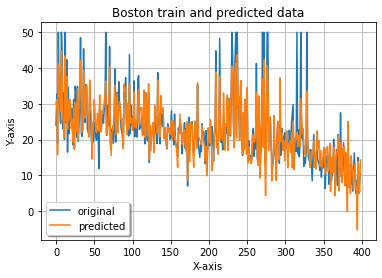

In [70]:
plt.plot(x1_ax, y1_orig, label="original")
plt.plot(x1_ax, y1_pred, label="predicted")
plt.title("Boston train and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  
 

In [71]:
test_data = model_reg_test.transform(test_df)
test_data.show(2)
 
x2_ax = range(0, test_data.count())
y2_pred = test_data.select("prediction").collect()
y2_orig = test_data.select("medv").collect()  

+--------------------+----+------------------+
|          Attributes|medv|        prediction|
+--------------------+----+------------------+
|[0.00906,90.0,2.9...|32.2| 30.83721803500684|
|[0.01096,55.0,2.2...|22.0|25.739098759447124|
+--------------------+----+------------------+
only showing top 2 rows



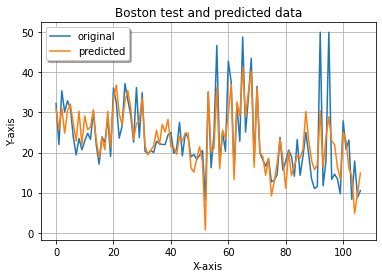

In [72]:
plt.plot(x2_ax, y2_orig, label="original")
plt.plot(x2_ax, y2_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  
 